### Target = median_house_value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('housing/housing.csv')
display(data.head())
display(data.tail())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data['median_house_value'].value_counts()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
34200.0       1
46200.0       1
352000.0      1
307900.0      1
385200.0      1
Name: count, Length: 3842, dtype: int64

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.shape

(20640, 10)

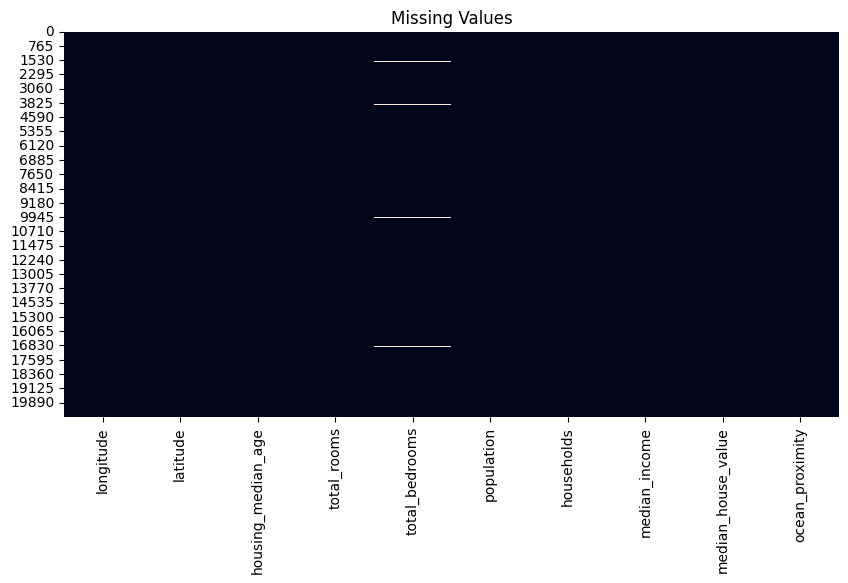

In [7]:
plt.figure(figsize=(10, 5))

sns.heatmap(data=data.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()

In [8]:
INFO = pd.concat([data.dtypes, data.isna().sum(), data.nunique()], axis=1)
INFO.columns = ['dtypes', 'isna_sum', 'nunique']
INFO

,dtypes,isna_sum,nunique
longitude,float64,0,844
latitude,float64,0,862
housing_median_age,float64,0,52
total_rooms,float64,0,5926
total_bedrooms,float64,207,1923
population,float64,0,3888
households,float64,0,1815
median_income,float64,0,12928
median_house_value,float64,0,3842
ocean_proximity,object,0,5


In [9]:
target = 'median_house_value'

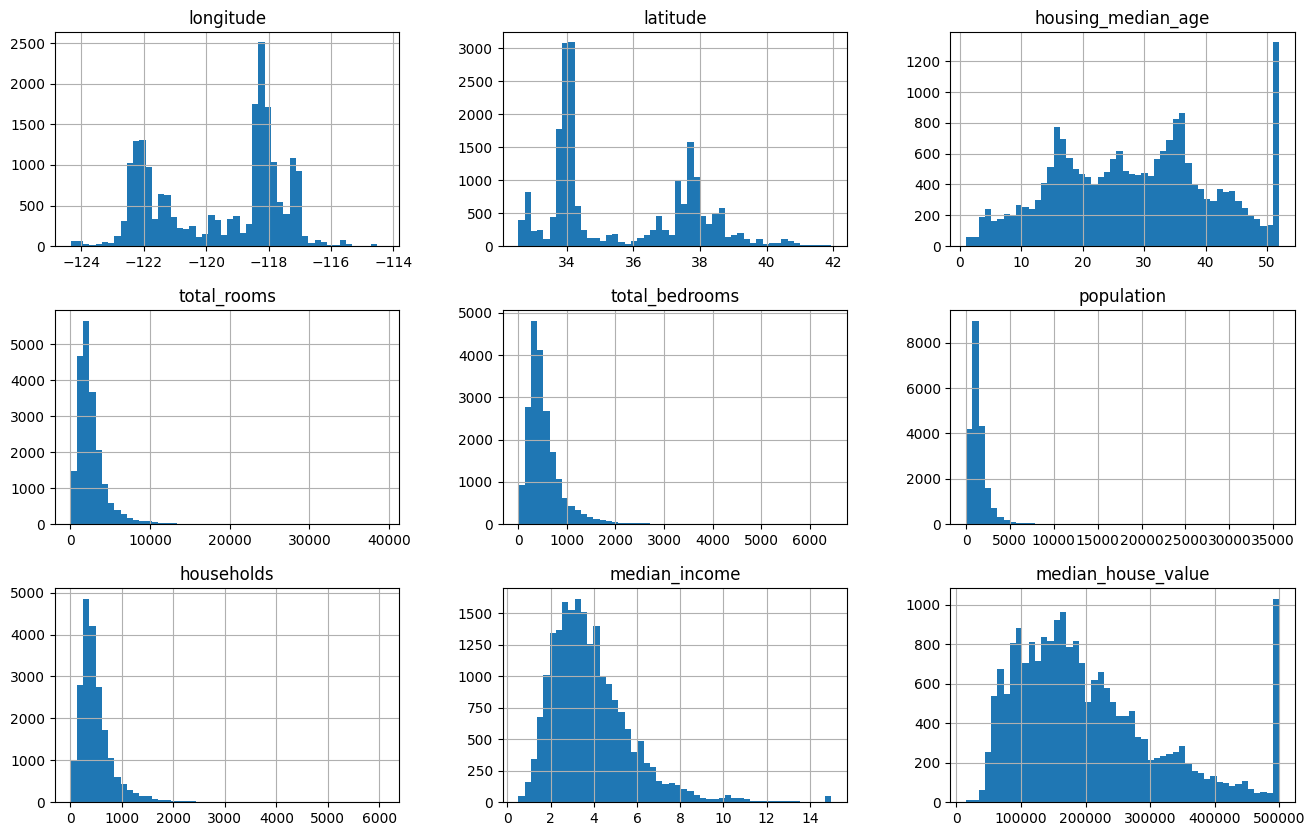

In [10]:
data.hist(bins=50, figsize=(16, 10))
plt.show()

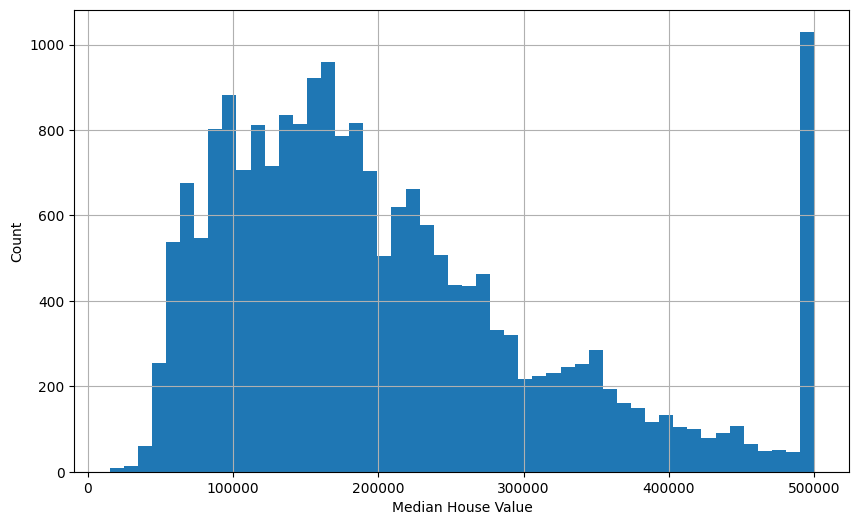

In [24]:
data[target].hist(bins=50, figsize=(10, 6))
plt.xlabel('Median House Value')
plt.ylabel('Count')
plt.show()

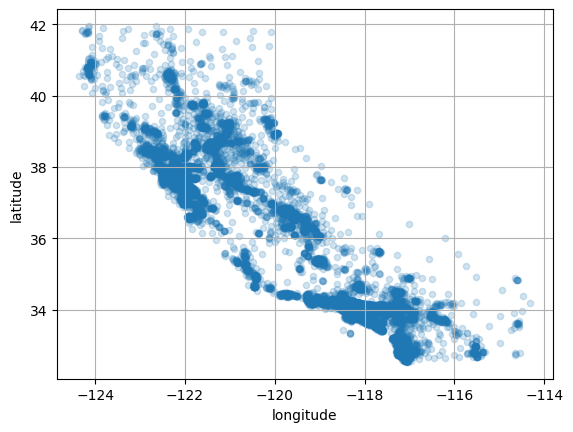

In [12]:
data.plot(kind='scatter', x='longitude', y='latitude', grid=True, alpha=0.2)
plt.show()

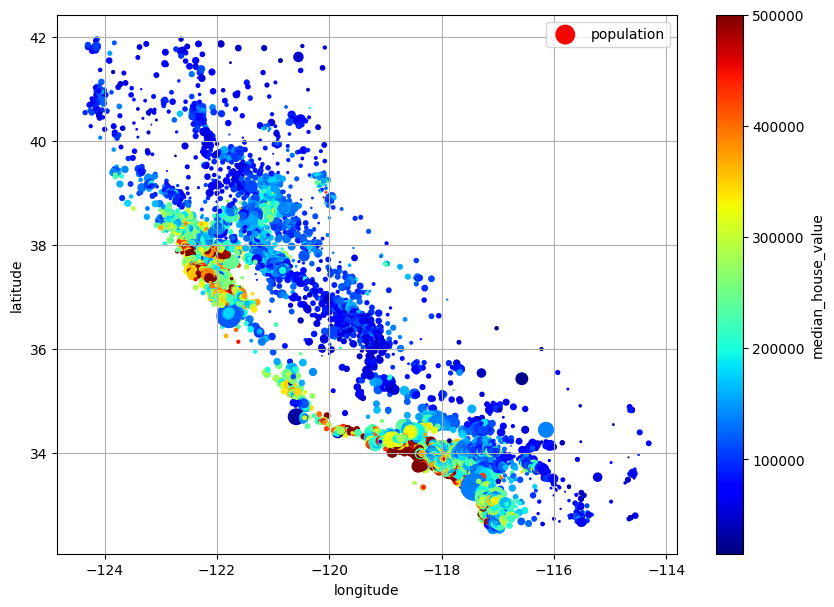

In [18]:
data.plot(kind='scatter', x='longitude', y='latitude', grid=True, s=data['population']/100, label='population', sharex=False, c='median_house_value', cmap='jet', colorbar=True, legend=True, figsize=(10, 7))
plt.show()

In [19]:
def encode_ocean_prox(value):
    if value == 'NEAR BAY':
        return 0
    elif value == '<1H OCEAN':
        return 1
    elif value == 'INLAND':
        return 2
    elif value == 'NEAR OCEAN':
        return 3
    elif value == 'ISLAND':
        return 4
    else:
        return -1

In [20]:
data['ocean_proximity_encoded'] = data['ocean_proximity'].apply(encode_ocean_prox)
data_encoded = data.drop(columns='ocean_proximity')
corr_matrix = data_encoded.corr(method='spearman')
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
longitude,1.000000,-0.879203,-0.150752,0.040120,0.063879,0.123527,0.060020,-0.009928,-0.069667,0.201434
latitude,-0.879203,1.000000,0.032440,-0.018435,-0.056636,-0.123626,-0.074299,-0.088029,-0.165739,-0.031267
housing_median_age,-0.150752,0.032440,1.000000,-0.357162,-0.306544,-0.283879,-0.281989,-0.147308,0.074855,-0.215293
total_rooms,0.040120,-0.018435,-0.357162,1.000000,0.915021,0.816185,0.906734,0.271321,0.205952,0.010515
total_bedrooms,0.063879,-0.056636,-0.306544,0.915021,1.000000,0.870937,0.975627,-0.006196,0.086259,0.003713
population,0.123527,-0.123626,-0.283879,0.816185,0.870937,1.000000,0.903872,0.006268,0.003839,-0.029730
households,0.060020,-0.074299,-0.281989,0.906734,0.975627,0.903872,1.000000,0.030305,0.112737,-0.025667
median_income,-0.009928,-0.088029,-0.147308,0.271321,-0.006196,0.006268,0.030305,1.000000,0.676778,-0.167954
median_house_value,-0.069667,-0.165739,0.074855,0.205952,0.086259,0.003839,0.112737,0.676778,1.000000,-0.314250
ocean_proximity_encoded,0.201434,-0.031267,-0.215293,0.010515,0.003713,-0.029730,-0.025667,-0.167954,-0.314250,1.000000


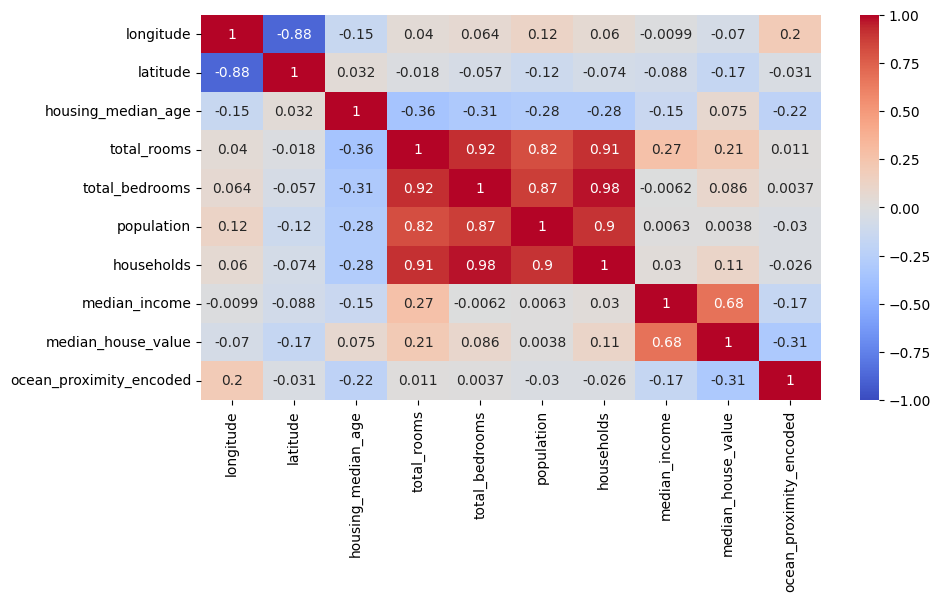

In [21]:
plt.figure(figsize=(10, 5))

sns.heatmap(data=corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

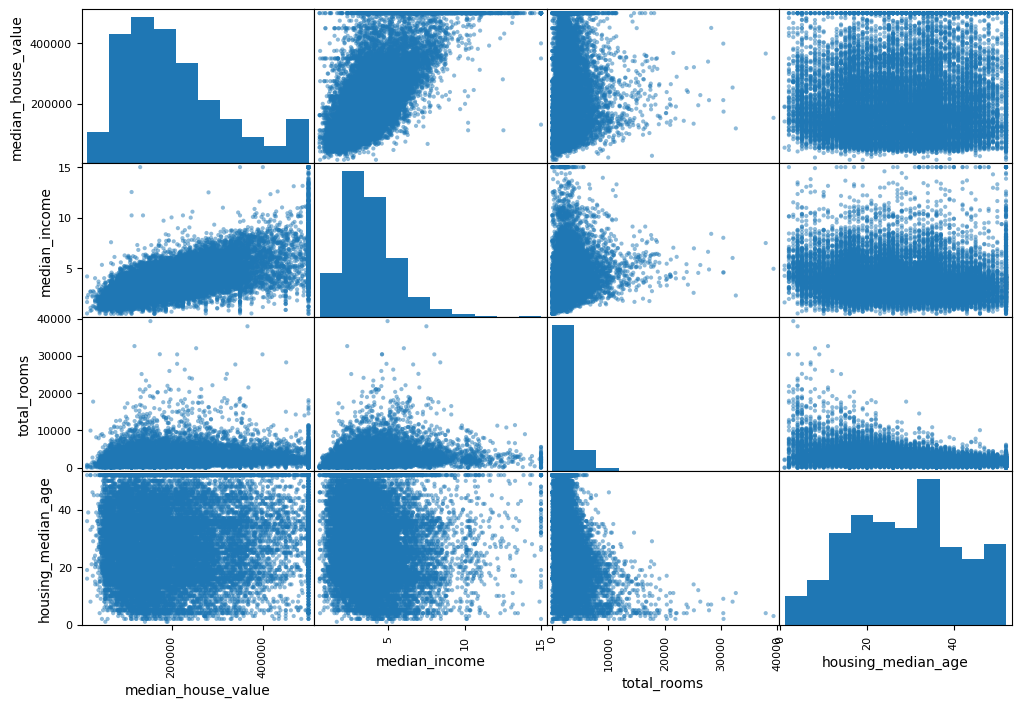

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

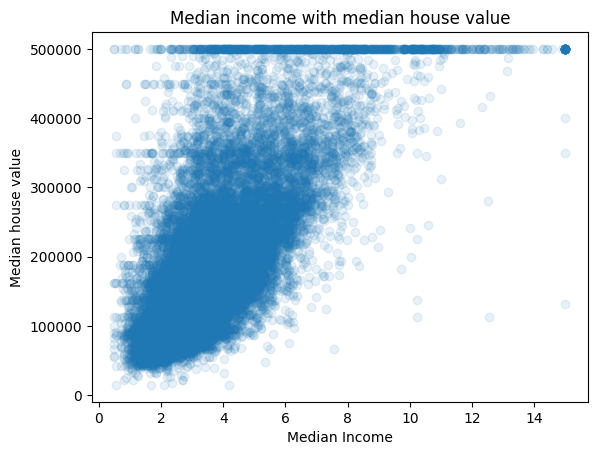

In [23]:
plt.scatter(data=data, x='median_income', y='median_house_value', alpha=0.1)
plt.title("Median income with median house value")
plt.xlabel("Median Income")
plt.ylabel("Median house value")
plt.show()